## Predict the Salary

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import pickle

In [2]:
df = pd.read_excel('hiring14.xlsx', engine='openpyxl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       72 non-null     object 
 1   test_score       84 non-null     float64
 2   interview_score  96 non-null     int64  
 3   salary           96 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ KB


### Fill missing values

In [4]:
df['experience'].fillna(0, inplace=True)
df['test_score'].fillna(df['test_score'].mean(), inplace=True)

<AxesSubplot:xlabel='salary'>

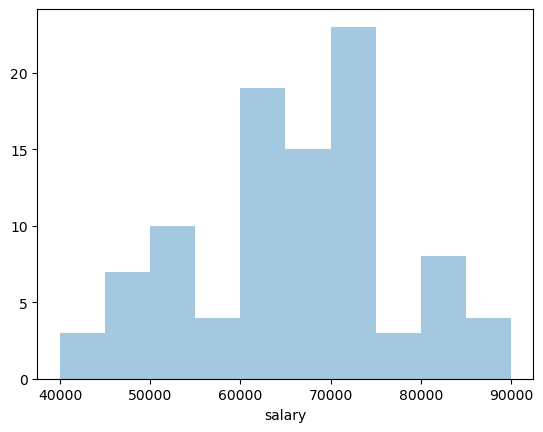

In [9]:
sns.distplot(df['salary'], bins=10, kde=False)

In [6]:
df['salary'].describe()

count       96.000000
mean     64635.416667
std      11897.916484
min      40000.000000
25%      58750.000000
50%      65000.000000
75%      72000.000000
max      90000.000000
Name: salary, dtype: float64

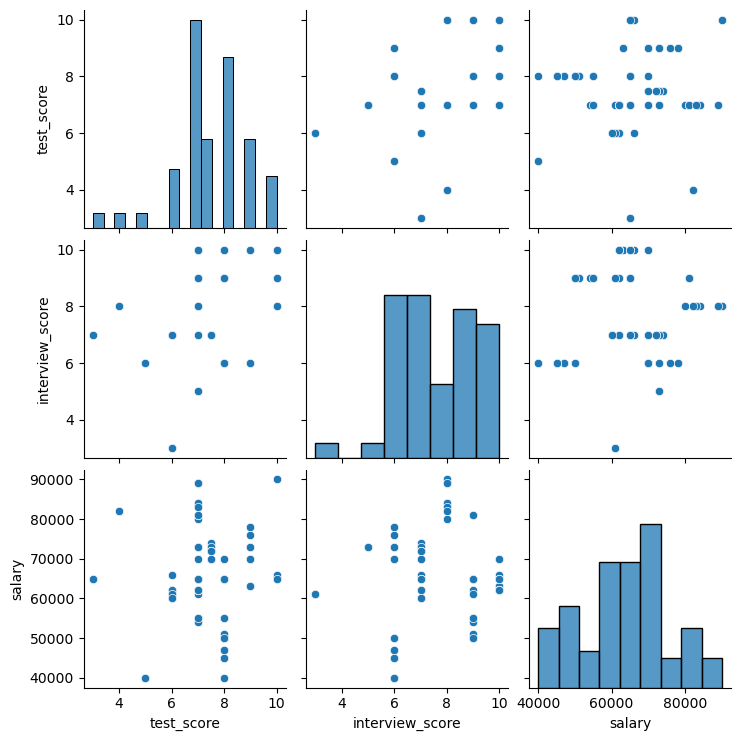

In [7]:
sns.pairplot(df)

### Define X ,Y 

In [10]:
X= df.iloc[:, :3]
Y= df.iloc[:, 3]

In [11]:
X.head()

,experience,test_score,interview_score
0,0,8.0,9
1,0,8.0,6
2,five,6.0,7
3,two,10.0,10
4,seven,9.0,6


#### Converting words to integer values

In [12]:
def convert_to_int (word):
    word_dict= {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7,
                'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12, 'zero': 0, 0:0}
    return word_dict[word]

In [13]:
X['experience']=X['experience'].apply(lambda x: convert_to_int(x))

In [14]:
X.head()

,experience,test_score,interview_score
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6


### Train_Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.1, random_state=1111)

### Creating and train the model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(x_train, y_train)

LinearRegression()

### Test the model

In [20]:
prediction= lm.predict(x_test)

<AxesSubplot:xlabel='salary'>

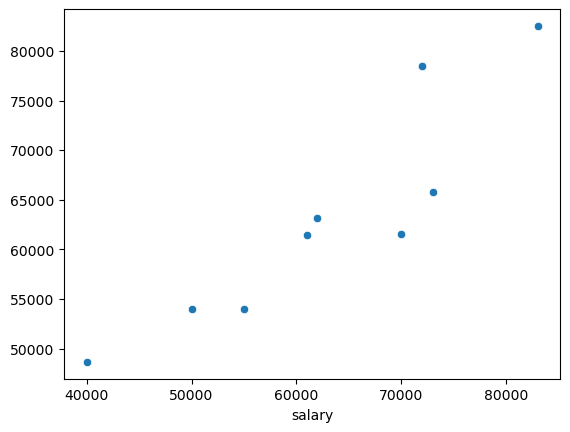

In [22]:
sns.scatterplot(x=y_test, y= prediction)

In [23]:
residual= y_test - prediction

C:\Users\nasim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


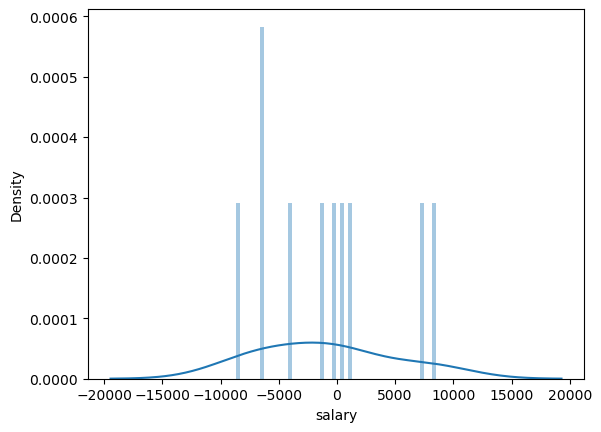

In [24]:
sns.distplot(residual, bins=50);

In [21]:
from sklearn import metrics

In [25]:
print ("MAE:", metrics.mean_absolute_error(y_test, prediction))
print ("MSE:", metrics.mean_squared_error(y_test, prediction))
print ("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4442.880238690468
MSE: 30231296.97498375
RMSE: 5498.299462104966


In [26]:
!pip install pickle5

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5
  Running setup.py install for pickle5: started
  Running setup.py install for pickle5: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-39\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-39\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-39\pickle5
  creating build\lib.win-amd64-cpython-39\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-39\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-39\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-39\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-39\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Microsoft Vi

In [27]:
import pickle

In [30]:
pickle.dump(lm, open('model.pkl', 'wb'))

In [32]:
model= pickle.load(open ('model.pkl', 'rb'))

#### sampel

In [34]:
print (model.predict([[2, 9, 6]]))

[55551.14295185]


C:\Users\nasim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
